<a href="https://colab.research.google.com/github/Danuka97/Cryptocurrency-price-prediction/blob/main/Part_2_Forward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = 'center'> Neural Networks Demystified </h1>
<h2 align = 'center'> Part 2: Forward Propagation </h2>


<h4 align = 'center' > Original author: @stephencwelch </h4>
<h4 align = 'center' > Edited by: Luca Zanotti Fragonara </h4>

In [12]:
#from IPython.display import YouTubeVideo
#YouTubeVideo('UJwK6jAStmg')

# Setting up the environment (if you are using Google Colab)
This practical relies on multiple files. If you want to speed up the session, we are going to recall previous parts of the practical and import them in the current part. Completed parts files (e.g. partOne.py) are listed in directory for convenience. If you are using Jupyter Notebook, you should not have too much trouble: you can just point to the correct directory.
If you are using Google Colab, it is a bit more tricky. Colab offers the possibility of importing files stored on your Google Drive in a very convenient way, as follows:

In [13]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization (notice authorization will need to be re-issued everytime you run the notebook from Colab)
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


You can list the contents of your drive with the !ls command:

In [14]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive/YOUR_PATH".
!ls "/content/drive/MyDrive/Practical-01_ForStudents/Part 1 Data and Architecture.ipynb"

'/content/drive/MyDrive/Practical-01_ForStudents/Part 1 Data and Architecture.ipynb'


In order to change the current directory you can use %cd:

In [15]:
%cd /content/drive/MyDrive/Practical-01_ForStudents

/content/drive/MyDrive/Practical-01_ForStudents


<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |

Please notice that mounting a google drive is not the only option to import files in Google Colab. For an extensive guide about input and output please refer to: https://colab.research.google.com/notebooks/io.ipynb


# Part 2
Last time, we setup our neural network on paper. This time, we’ll implement it in the programming language python. We’ll build our network as a python class and our init method will take care of instantiating important constants and variables. We’ll make these values accessible to the whole class by placing a self dot in front of each variable name.

Our network has 2 inputs, 3 hidden units, and 1 output. These are examples of hyperparameters. Hyperparameters are constants that establish the structure and behavior of a neural network, but are not updated as we train the network. Our learning algorithm is not capable of, for example, deciding that it needs another hidden unit, this is something that WE must decide on before training. What a neural network does learn are parameters, specifically the weights on the synapses.

We’ll take care of moving data through our network in a method called forward. Rather than pass inputs through the network one at a time, we’re going to use matrices to pass through multiple inputs at once. Doing this allows for big computational speedups, especially when using tools like MATLAB or Numpy. Our input data matrix, **X**, is of dimension 3 by 2, because we have 3, 2-dimensional examples. Our corresponding output data, y, is of dimension 3 by 1.

In [16]:
#When the %pylab magic function is entered at the IPython prompt, it triggers the import of various modules within Matplotlib and numpy as np
%pylab inline

#Import code from last time as an useful starting point
from partOne import *

Populating the interactive namespace from numpy and matplotlib


In [17]:
print(X.shape, y.shape)

(3, 2) (3, 1)


In [18]:
#Define a new Neural_Network class that we are going to use in the following parts, adding various methods to it:
class Neural_Network(object):
    def __init__(self,input_nodes, hidden_nodes, output_nodes):        
        #Define Hyperparameters
        self.inputLayerSize = input_nodes #YOUR CODE HERE
        self.outputLayerSize = output_nodes #YOUR CODE HERE
        self.hiddenLayerSize = hidden_nodes #YOUR CODE HERE

        self.W_input = np.random.randn(self.input_nodes,self.hidden_nodes)
        self,W_output = np.random.randn(self.hidden_nodes,self.output_nodes)
        
    def forward(self, X):
        #Propagate inputs though network
        self.h1 = np.dot(X,self.W_input)
        self.a2 = self.singmoid(self.h1)
        self.h2 = np.dot(self.a2,self,W_output)
        yHat = sigmoid(self.h2)
        return yHat
    def singmoid(self,h):
      return 1/(1+np.exp(-h))

Each input value, or element in matrix **X**, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix **X**. From here on out, we'll refer to these matrics as **X**, **W** one, and **z** two, where z two the activity of our second layer. Notice that each entry in **z** is a sum of weighted inputs to each hidden neuron. **Z** is of size 3 by 3, one row for each example, and one column for each hidden unit.

We now have our first official formula, $z^{(2)} = XW^{(1)}$. Matrix notation is really nice here, because it allows us to express the complex underlying process in a single line!

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$


## Sigmoid activation function
Now that we have the activities for our second layer, z two, we need to apply the activation function. We'll independently apply the function to each entry in matrix z using a python method for this called sigmoid, because we’re using a sigmoid as our activation function. Using numpy is really nice here, because we can pass in a scalar, vector, or matrix, Numpy will apply the activation function element-wise, and return a result of the same dimension as it was given.

In [19]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z)) #YOUR CODE HERE

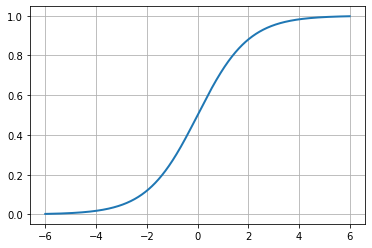

In [20]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

In [21]:
#Compute the sigmoid of 1
sigmoid(1)
    
#Expected Output should be:
# 0.7310585786300049

0.7310585786300049

In [22]:
#Compute the sigmoid for an 1x3 array [-1,0,1]
sigmoid(np.array([-1,0,1]))

#Expected Output should be: 
# array([0.26894142, 0.5       , 0.73105858])

array([0.26894142, 0.5       , 0.73105858])

In [23]:
sigmoid(np.random.randn(3,3))

array([[0.37845547, 0.40438437, 0.42241225],
       [0.65799764, 0.68466675, 0.6750304 ],
       [0.31861049, 0.42982824, 0.46262439]])

 We now have our second formula for forward propagation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

To finish forward propagation we need to propagate a two all the way to the output, yhat. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply a two by our second layer weights W2 and apply one more activation funcion. W2 will be of size 3x1, one weight for each synapse. Multiplying a2, a 3 by 3, by W2, a 3 by 1 results in a 3 by 1 matrix z three, the activity or our third layer. z3 has three activity values, one for each example. Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat.  

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

We need to implement our forward propagation formulas in python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers. 

## Forward propagation
We'll implement forward propagation in our forward method, using numpy's built in dot (np.dot) method for matrix multiplication and our own sigmoid method. 

In [24]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2 #YOUR CODE HERE
        self.outputLayerSize = 1 #YOUR CODE HERE
        self.hiddenLayerSize = 3 #YOUR CODE HERE
        
        #Weights (parameters) - random initialization according to layer dimensions
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize) #YOUR CODE HERE
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize) #YOUR CODE HERE
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1) #YOUR CODE HERE
        self.a2 = self.sigmoid(self.z2) #YOUR CODE HERE
        self.z3 = np.dot(self.a2, self.W2)#YOUR CODE HERE
        yHat = self.sigmoid(self.z3) #YOUR CODE HERE
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z)) #YOUR CODE HERE

And there you have it, a Python class capable of estimating your test score given how many hours you sleep and how many hours you study. We can pass in our input data and get real outputs. Now, you may be noticing that our estimates are quite terrible. That's because we have not yet trained our network, that's what we'll work on next time.